## Example for extending Mondrian Trees

In [1]:
import Base.copy
using Distributions
using MLBase
using Plots
include("./Mondrian_Forest_Classifier.jl"); 
include("Mondrian_extention.jl")

expand_forest!

This notebook explains how to extend Mondrian Trees and Mondrian Forests. Using an online algorithm, we can incorporate data points one by one.

### Functions

All functions used in this section can be found in the files "Mondrian_extention.jl" and "Mondrian_extention_utils.jl". 

In [ ]:
?Extend_Mondrian_Tree!

In [ ]:
?Extend_Mondrian_Tree!

In [ ]:
?expand!

In [ ]:
?expand_forest!

#### 1) Prepare some data

We generate two sets of fakedata (features + classes). We use the first one to train on and the second one to extend on.

In [2]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 2
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 2
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

Fakedata3Classif (generic function with 2 methods)

In [3]:
X, Y, x, y = Fakedata3Classif(5000,2,5000);  #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

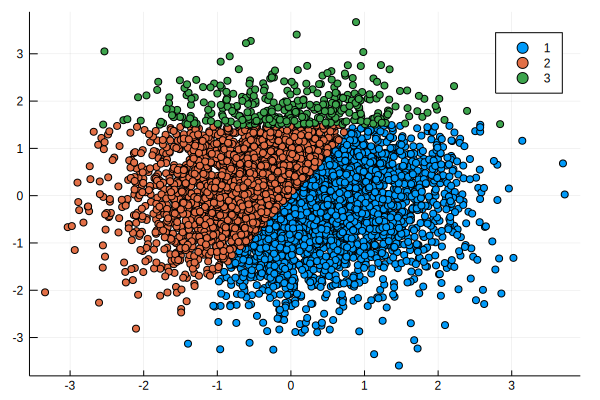

In [4]:
if size(X,2)==2
    plot()
    for class in unique(Y)
        scatter!(X[Y.==class,1],X[Y.==class,2],label="$class")
    end
    plot!()
end

### 1) Extend a single tree

To extend a single tree, we can just use the function expand!. We train a Mondrian Tree Classifier on the dataset X,Y and then extend it on the dataset x,y which we created above. We compute the training accuracy of the extended tree. For comparison, we then train a Mondrian Tree Classifier on the merges dataset X,x Y,y (it was then trained on all of the data the extended tree was trained on, without using extentions) and compute the training accuracy as well.  

In [5]:
T = Mondrian_Tree_Classifier()
train!(T,X,Y,1e9);  #Sample tree on training dataset

In [6]:
expand!(T,x,y,1e9);  #Expand the tree on the extention dataset

In [7]:
#merge training and extention data to get the total data the tree was trained on

All_data=vcat(X,x);             
all_labels = vcat(Y,y);

In [8]:
#let the extended tree predict the training data, compute training accuracy
pred=predict!(T,All_data);     
println("Train Accuracy of extended tree")
println(correctrate(all_labels,convert(Array{Int,1},pred)))

Train Accuracy of extended tree
0.7696


In [9]:
#compute a tree on the merged dataset (classic, no extention)
T_full = Mondrian_Tree_Classifier()
train!(T_full,All_data,all_labels,1e9);

In [10]:
#let the extended tree predict the training data, compute training accuracy

println("Train Accuracy tree trained on whole dataset")
pred=predict!(T_full,All_data)
println(correctrate(all_labels,convert(Array{Int,1},pred)))

Train Accuracy tree trained on whole dataset
0.9128


We see that the training accuracy is comparable weather we extend the tree or weather we sample the tree on the whole dataset immediatly. This proves that the extention implementation works.

### 2) Extend Mondrian Forests

Now we extend a Mondrian Forest classifier that was pretrained on the  training same dataset (X,Y) as above. We again extend the classifier and then train a new classifier on the whole datset for comparison.

In [11]:
MF = Mondrian_Forest_Classifier(50)  #initialise Mondrian Forest Classifier with 50 Trees

In [12]:
train!(MF, X, Y, 1e9);  #Train the classifier on the same dataset as before

Mondrian Forest Classifier with 50 Mondrian trees:


In [ ]:
expand_forest!(MF,x,y,1e9);  #expand the forest on the dataset x,y

In [ ]:
#compute train accuracy for extended forest

pred=predict!(MF, All_data);
println("Train Accuracy")
println(correctrate(all_labels,convert(Array{Int,1},pred)))

In [ ]:
MF_control = Mondrian_Forest_Classifier(50)   #initialise control classifier with 50 Trees
train!(MF_control, All_data, all_labels, 1e9);  # train control classifier on merged dataset

In [ ]:
#compute train accuracy for classic forest

pred = predict!(MF_control,All_data);
println("Train Accuracy")
println(correctrate(all_labels,convert(Array{Int,1},pred)))

#### Some Testing and Benchmarking

How fast is the extention? 

In [1089]:
X, Y,x ,y = Fakedata3Classif(5000,4,5000); #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

In [1090]:
println(size(X))

(5000, 4)


In [781]:
MF=Mondrian_Forest_Classifier(100)
Acc=zeros(150);
Time=[];

In [ ]:
counter=1
train!(MF,X,Y,1e9);
pred=predict!(MF,X)
Acc[counter]=correctrate(Y,convert(Array{Int,1},pred))

In [ ]:
expand_forest!(MF,x,y,1e9);
pred=predict!(MF,vcat(X,x))
Acc[counter]=correctrate(vcat(Y,y),convert(Array{Int,1},pred))

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
X, Y,x ,y = Fakedata3Classif(100,2,100); #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

In [ ]:
T = Mondrian_Tree_Classifier()
train!(T,X[1:20,:],Y[1:20],1e9);
pred=predict!(T,x)
correctrate(y,convert(Array{Int,1},pred))

In [ ]:
T = Mondrian_Tree_Classifier()
train!(T,X[1:40,:],Y[1:40],1e9);
pred=predict!(T,x)
correctrate(y,convert(Array{Int,1},pred))

In [ ]:
T = Mondrian_Tree_Classifier()
train!(T,X[1:60,:],Y[1:60],1e9);
pred=predict!(T,x)
correctrate(y,convert(Array{Int,1},pred))

In [ ]:
T = Mondrian_Tree_Classifier()
train!(T,X[1:80,:],Y[1:80],1e9);
pred=predict!(T,x)
correctrate(y,convert(Array{Int,1},pred))

### batch training

##### Single tree

In [1403]:
X, Y,x ,y = Fakedata3Classif(100,2,100); #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

In [1404]:
T = Mondrian_Tree_Classifier()
train!(T,X[1:20,:],Y[1:20],1e9)  #Sample tree on training dataset

PAUSED
PAUSED
PAUSED
PAUSED
PAUSED


Mondrian Tree Classifier:
    Mondrian Tree with 6 leaves

In [1405]:
j_print((T.Tree).root)

[7, 10, 3]
[0, 3, 0]
[7, 7, 3]
node done
[7, 7, 3]
[7, 7, 1]
[0, 0, 2]
node done
[7, 7, 1]
[0, 4, 0]
[7, 3, 1]
node done
[7, 3, 1]
[2, 3, 1]
[5, 0, 0]
node done
[2, 3, 1]
[1, 0, 0]
[1, 3, 1]
node done


In [1406]:
ϵ =  (T.Tree).root
get(ϵ).c
get(ϵ).node_type
leaf_check(ϵ)


[0, 3, 0]
[0, 4, 0]
[1, 0, 0]
[1, 3, 1]
[5, 0, 0]
[0, 0, 2]


In [1407]:
pred=predict!(T,x)
correctrate(y,convert(Array{Int,1},pred))

0.76

In [1408]:
expand!(T,X[21:40,:],Y[21:40],1e9)

new extention
[7, 10, 3]
2
2.2
[7, 7, 3]
2
2.1
[7, 7, 1]
2
2.1
[0, 4, 0]
[7, 11, 3]
[0, 3, 0]
[7, 8, 3]
node done
[7, 8, 3]
[7, 8, 1]
[0, 0, 2]
node done
[7, 8, 1]
[0, 5, 0]
[7, 3, 1]
node done
[7, 3, 1]
[2, 3, 1]
[5, 0, 0]
node done
[2, 3, 1]
[1, 0, 0]
[1, 3, 1]
node done
new extention
[7, 11, 3]
2
2.2
[7, 8, 3]
2
2.1
[7, 8, 1]
2
2.1
[0, 5, 0]
[7, 12, 3]
[0, 3, 0]
[7, 9, 3]
node done
[7, 9, 3]
[7, 9, 1]
[0, 0, 2]
node done
[7, 9, 1]
[0, 6, 0]
[7, 3, 1]
node done
[7, 3, 1]
[2, 3, 1]
[5, 0, 0]
node done
[2, 3, 1]
[1, 0, 0]
[1, 3, 1]
node done
new extention
[7, 12, 3]
2
2.2
[7, 9, 3]
2
2.1
[7, 9, 1]
2
2.1
[0, 6, 0]
[7, 13, 3]
[0, 3, 0]
[7, 10, 3]
node done
[7, 10, 3]
[7, 10, 1]
[0, 0, 2]
node done
[7, 10, 1]
[0, 7, 0]
[7, 3, 1]
node done
[7, 3, 1]
[2, 3, 1]
[5, 0, 0]
node done
[2, 3, 1]
[1, 0, 0]
[1, 3, 1]
node done
new extention
[7, 13, 3]
2
2.2
[7, 10, 3]
2
2.1
[7, 10, 1]
2
2.1
[0, 7, 0]
[7, 14, 3]
[0, 3, 0]
[7, 11, 3]
node done
[7, 11, 3]
[7, 11, 1]
[0, 0, 2]
node done
[7, 11, 1]
[0, 

Mondrian Tree Classifier:
    Mondrian Tree with 7 leaves

In [1409]:
pred=predict!(T,X)
correctrate(Y,convert(Array{Int,1},pred))

0.92

In [1210]:
j_print((T.Tree).root)

[12, 14, 5]
[5, 0, 0]
[7, 14, 5]
node done
[7, 14, 5]
[5, 8, 0]
[2, 6, 5]
node done
[5, 8, 0]
[5, 0, 0]
[0, 8, 0]
node done
[2, 6, 5]
[1, 6, 0]
[1, 0, 5]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 5]
[1, 0, 1]
[0, 0, 4]
node done


In [1211]:
ϵ =  (T.Tree).root
leaf_check(ϵ)

[5, 0, 0]
[5, 0, 0]
[0, 8, 0]
[1, 4, 0]
[0, 2, 0]
[1, 0, 1]
[0, 0, 4]


In [1212]:
expand!(T,X[41:60,:],Y[41:60],1e9)

new extention
[12, 14, 5]
2
2.2
[7, 14, 5]
2
2.1
[5, 8, 0]
2
2.1
[5, 0, 0]
[13, 14, 5]
[5, 0, 0]
[8, 14, 5]
node done
[8, 14, 5]
[6, 8, 0]
[2, 6, 5]
node done
[6, 8, 0]
[6, 0, 0]
[0, 8, 0]
node done
[2, 6, 5]
[1, 6, 0]
[1, 0, 5]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 5]
[1, 0, 1]
[0, 0, 4]
node done
new extention
[13, 14, 5]
2
2.2
[8, 14, 5]
2
2.1
[6, 8, 0]
2
2.1
[6, 0, 0]
[14, 14, 5]
[5, 0, 0]
[9, 14, 5]
node done
[9, 14, 5]
[7, 8, 0]
[2, 6, 5]
node done
[7, 8, 0]
[7, 0, 0]
[0, 8, 0]
node done
[2, 6, 5]
[1, 6, 0]
[1, 0, 5]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 5]
[1, 0, 1]
[0, 0, 4]
node done
new extention
[14, 14, 5]
2
2.2
[9, 14, 5]
2
2.1
[7, 8, 0]
2
2.2
[0, 8, 0]
PAUSED
[14, 14, 5]
[5, 0, 0]
[9, 14, 5]
node done
[9, 14, 5]
[7, 8, 0]
[2, 6, 5]
node done
[7, 8, 0]
[7, 0, 0]
[0, 8, 0]
node done
[2, 6, 5]
[1, 6, 0]
[1, 0, 5]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 5]
[1, 0, 1]
[0, 0, 4]
node done
new extention
[14, 14, 5]
2
2.2
[9, 

Mondrian Tree Classifier:
    Mondrian Tree with 11 leaves

In [1213]:
pred=predict!(T,X)
correctrate(Y,convert(Array{Int,1},pred))

0.78

In [1214]:
ϵ =  (T.Tree).root
leaf_check(ϵ)

[6, 0, 0]
[11, 0, 0]
[0, 11, 0]
[1, 4, 0]
[0, 2, 0]
[1, 0, 1]
[0, 0, 6]


In [1215]:
expand!(T,X[61:80,:],Y[61:80],1e9)

new extention
[19, 17, 7]
2
2.2
[13, 17, 7]
2
2.2
[2, 6, 7]
2
2.1
[1, 6, 0]
2
2.1
[1, 4, 0]
2
[19, 17, 7]
[6, 0, 0]
[13, 17, 7]
node done
[13, 17, 7]
[11, 11, 0]
[2, 6, 7]
node done
[11, 11, 0]
[11, 0, 0]
[0, 11, 0]
node done
[2, 6, 7]
[1, 6, 0]
[1, 0, 7]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 7]
[1, 0, 1]
[0, 0, 6]
node done
new extention
[19, 17, 7]
2
2.2
[13, 17, 7]
2
2.1
[11, 11, 0]
2
2.2
[0, 11, 0]
[19, 18, 7]
[6, 0, 0]
[13, 18, 7]
node done
[13, 18, 7]
[11, 12, 0]
[2, 6, 7]
node done
[11, 12, 0]
[11, 0, 0]
[0, 12, 0]
node done
[2, 6, 7]
[1, 6, 0]
[1, 0, 7]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 7]
[1, 0, 1]
[0, 0, 6]
node done
new extention
[19, 18, 7]
2
2.2
[13, 18, 7]
2
2.1
[11, 12, 0]
2
2.2
[0, 12, 0]
[19, 19, 7]
[6, 0, 0]
[13, 19, 7]
node done
[13, 19, 7]
[11, 13, 0]
[2, 6, 7]
node done
[11, 13, 0]
[11, 0, 0]
[0, 13, 0]
node done
[2, 6, 7]
[1, 6, 0]
[1, 0, 7]
node done
[1, 6, 0]
[1, 4, 0]
[0, 2, 0]
node done
[1, 0, 7]
[1, 0, 1]
[0, 0, 6]
no

Mondrian Tree Classifier:
    Mondrian Tree with 14 leaves

In [1216]:
pred=predict!(T,X)
correctrate(Y,convert(Array{Int,1},pred))

0.78

True Tree

In [1217]:
T=Mondrian_Tree_Classifier()
train!(T,X,Y,1e9)

PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED


Mondrian Tree Classifier:
    Mondrian Tree with 19 leaves

In [1362]:
ϵ =  (T.Tree).root
a = get(ϵ).left
 get(get(a).parent).c[2]
# get(get(j_wave).parent).c[Y]

17

In [1219]:
pred=predict!(T,X)
correctrate(Y,convert(Array{Int,1},pred))

0.78

In [1223]:
T=Mondrian_Tree_Classifier()
Acc=[];
Time=[];

In [1224]:
counter=1
train!(T,X[1:20,:],Y[1:20],1e9);
pred=predict!(T,X)
append!(Acc,correctrate(Y,convert(Array{Int,1},pred)))

PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED
PAUSED


1-element Array{Any,1}:
 0.63

In [1225]:
i=21
while i<100
    tic()
    expand!(T,X[i:i+19,:],Y[i:i+19,:],1e9)
    println(T)
    t=toq()
    println("The time is")
    println(t)
    push!(Time,t)
    pred=predict!(T,X)
    append!(Acc,correctrate(Y,convert(Array{Int,1},pred)))
    i=i+20
    println("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
end

new extention
[5, 12, 3]
2
2.1
[1, 4, 0]
2
[5, 12, 3]
[1, 4, 0]
[4, 8, 3]
node done
[4, 8, 3]
[1, 0, 0]
[3, 8, 3]
node done
[3, 8, 3]
[3, 2, 1]
[0, 6, 2]
node done
[3, 2, 1]
[1, 0, 0]
[2, 2, 1]
node done
[2, 2, 1]
[2, 1, 1]
[0, 1, 0]
node done
[2, 1, 1]
[0, 0, 1]
[2, 1, 0]
node done
[0, 6, 2]
[0, 3, 0]
[0, 3, 2]
node done
[0, 3, 2]
[0, 3, 1]
[0, 0, 1]
node done
[0, 3, 1]
[0, 3, 0]
[0, 0, 1]
node done
new extention
[5, 12, 3]
2
2.2
[4, 8, 3]
2
2.2
[3, 8, 3]
2
2.2
[0, 6, 2]
2
2.1
[0, 3, 0]
[5, 13, 3]
[1, 4, 0]
[4, 9, 3]
node done
[4, 9, 3]
[1, 0, 0]
[3, 9, 3]
node done
[3, 9, 3]
[3, 2, 1]
[0, 7, 2]
node done
[3, 2, 1]
[1, 0, 0]
[2, 2, 1]
node done
[2, 2, 1]
[2, 1, 1]
[0, 1, 0]
node done
[2, 1, 1]
[0, 0, 1]
[2, 1, 0]
node done
[0, 7, 2]
[0, 4, 0]
[0, 3, 2]
node done
[0, 3, 2]
[0, 3, 1]
[0, 0, 1]
node done
[0, 3, 1]
[0, 3, 0]
[0, 0, 1]
node done
new extention
[5, 13, 3]
2
2.1
[1, 4, 0]
2
[5, 13, 3]
[1, 4, 0]
[4, 9, 3]
node done
[4, 9, 3]
[1, 0, 0]
[3, 9, 3]
node done
[3, 9, 3]
[3, 2, 1]
[0

LoadError: [91mNullException()[39m

In [1226]:
Acc

1-element Array{Any,1}:
 0.63

In [858]:
j_print((T.Tree).root)

[46, 22, 7]
[38, 22, 0]
[38, 22, 0]
node done
[38, 22, 0]
[26, 10, 0]
[0, 5, 0]
node done
[26, 10, 0]
[0, 2, 0]
[26, 8, 0]
node done
[26, 8, 0]
[26, 0, 0]
[0, 8, 0]
node done
[38, 22, 0]
[0, 1, 0]
[38, 22, 0]
node done
[38, 22, 0]
[26, 10, 0]
[0, 5, 0]
node done
[26, 10, 0]
[0, 2, 0]
[26, 8, 0]
node done
[26, 8, 0]
[26, 0, 0]
[0, 8, 0]
node done


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [697]:
X, Y,x ,y = Fakedata3Classif(1500,2,1500); #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

In [698]:
T=Mondrian_Tree_Classifier()
Acc=zeros(10);
Time=[];

In [699]:
counter=1
train!(T,X[1:150,:],Y[1:150],1e9);
pred=predict!(T,X)
Acc[counter]=correctrate(Y,convert(Array{Int,1},pred))

0.744

In [700]:
i=151
while i<1500
    counter = counter+1
    tic()
    expand!(T,X[i:i+149,:],Y[i:i+149,:],1e9);
    println(T)
    t=toq()
    println("The time is")
    println(t)
    push!(Time,t)
    pred=predict!(T,X)
    Acc[counter]=correctrate(Y,convert(Array{Int,1},pred))
    i=i+150
    println("The accuracy")
    println(Acc[counter])
    println("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
end

new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2


Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[35, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2


[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2


2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.2
[0, 7, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, fals

Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[67, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[25, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.2
[0, 8, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[68, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82,

[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[30, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[75, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool

2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.2
[3, 8, 0]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[82, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[37, 0, 0]
new extention
[82, 60, 8]
2
Boo

[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[93, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[94, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[

Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[48, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[102, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false,

Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[53, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[115, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
ne

2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.2
[0, 0, 23]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, fals

[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[61, 0, 0]
new

[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[135, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.2
[0, 0, 26]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[136, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[8

Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.2
[0, 0, 29]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[144, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false,

2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[156, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[157, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[158, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 

Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[168, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[169, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1

[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.2
[0, 17, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[75, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[186, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[8

2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bo

new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.2
[3, 8, 0]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[195, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false

2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[208, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]

[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2


Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool

[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[234, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2

[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.2
[0, 0, 57]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, 

new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[255, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[256, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[257, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[100, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, 

2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[102, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention


[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.1
[106, 0, 0]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false,

Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.2
[3, 8, 0]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true,

Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.2
[41, 47, 2]
2
Bool[false, true, false]
new extention
[82, 60, 8]
2
Bool[false, false, true]
2.1
[82, 60, 2]
2
Bool[true, false, false]
2.2
[71, 60, 2]
2
Bool[true, false, false]
2.1
[71, 55, 2]
2
Bool[true, false, false]
2.1
[30, 8, 0]
2
Bool[true, false, false]
2.1
[291, 0, 0]
new extention
[82

In [701]:
Acc

10-element Array{Float64,1}:
 0.744
 0.744
 0.744
 0.744
 0.744
 0.744
 0.744
 0.744
 0.744
 0.744

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
MF=Mondrian_Forest_Classifier(100)
Acc=zeros(150);
Time=[];

In [ ]:
counter=1
tic()
train!(MF,X[1:150,:],Y[1:150],1e9);
toc()
pred=predict!(MF,x)
Acc[counter]=correctrate(y,convert(Array{Int,1},pred))

In [ ]:
tic()
expand_forest!(MF,X[151:300,:],Y[151:300,:],1e9)
toc()

In [ ]:
pred=predict!(MF,x);

In [ ]:
correctrate(y,convert(Array{Int,1},pred))

In [ ]:
expand_forest!(MF,X[151:300,:],Y[151:300,:],1e9);
pred=predict!(MF,x)
Acc[counter]=correctrate(y,convert(Array{Int,1},pred))

In [ ]:
i=151
while i<15000
    counter = counter+1
    tic()
    expand_forest!(MF,X[i:i+149,:],Y[i:i+149,:],1e9);
    t=toq()
    println("The time is")
    println(t)
    push!(Time,t)
    pred=predict!(MF,x)
    Acc[counter]=correctrate(y,convert(Array{Int,1},pred))
    i=i+150
    println("The accrucary")
    println(Acc[counter])
end

In [1311]:
include("Mondrian_extention_utils.jl");
"""
`function Extend_Mondrian_Tree!(T::Mondrian_Tree,λ::Float64,X::Array{Float64} where N,Y::Int64) `

This function extends an already existing Mondrian Tree by ONE new datapoint that gets incorperated in the tree. 

`Input`: Mondrian Tree T (abstract type Mondrian_Tree), Lifetime parameter λ (Float64), 1dim Array of Features Array X (Array of Float64), classlabel Y (Int64)

`Output`: Mondrian Tree

`Files needed to run this function`: "Mondrian_Forest_Classifier.jl", "Mondrian_extention.jl"

This function calls the function Extend_Mondrian_Block.

The usage of the function "expand!" is recommended to expand Mondrian Trees as it has a nicer user interface.

"""
## Algorithm 3 in the Paper "Mondrian Forests: Efficient Online Random Forests"
function Extend_Mondrian_Tree!(T::Mondrian_Tree,λ::Float64,X::Array{Float64},Y::Int64) 
    println("new extention")
    ϵ=get(T.root)
    Extend_Mondrian_Block!(T,λ,ϵ,X,Y)
    j_print(T.root)
    return T
end


"""
`function Extend_Mondrian_Block!(T::Mondrian_Tree,λ::Float64,j::Mondrian_Node,X::Array{Float64},Y::Int64)`

This function extends a Mondrian Block to incorporate ONE new datapoint. 

`Input`: Mondrian Tree T (abstract type Mondrian_Tree), Lifetime parameter λ (Float64), Mondrian Node j (abstract type Mondrian_Node), 1dim Array of Features Array X (Array of Float64), classlabel Y (Int64)

`Output`: Modified nodes in the input tree

`Files needed to run this function`: Mondrian_Forest_Classifier.jl", "Mondrian_extention.jl"

This function calls the functions 

- Extended_dimension()

- sample_extended_split_dimension

- Sample_Mondrian_Block!

- update_intervals


"""

## Algorithm 4 in the Paper 
function Extend_Mondrian_Block!(T::Mondrian_Tree,λ::Float64,j::Mondrian_Node,X::Array{Float64},Y::Int64)
    println(j.c)
if sum(j.c .> 0) == 1  #check if all labels are identical
     Θ = update_intervals(get(j.Θ),X)        # update extent
     j.Θ=Θ 
         if findmax(j.c)[2] == Y
             i = findmax(j.c)[2]
             j.c[i] = j.c[i]+1
             backpropergate_c_tab(j,Y)
             return
         else
            j.node_type = [true,false,false]
            A=zeros(1,length(X))
            A[:,:]=X
            Sample_Mondrian_Block!(j,get(j.Θ),λ,T,A,[Y])
         end        
        
else
       #println("not a leaf")
    E = rand(Exponential(1/Extended_dimension(get(j.Θ),X)))  #sample value E
    if j.node_type[3]==true
        # check if the node we're looking at is the root (if yes the split time is assumed to be 0)
            #println("j is the root")
        τₚ = 0
    else
            #println("j is not the root")
        τₚ = (get(j.parent)).τ                               # if it's not the root get the split time of the node above j
    end
    if τₚ + E < j.τ                                          # check if our split happens in time
          println(1)                                                  
        d,x= sample_extended_split_dimension(get(j.Θ),X)     # sample new split dimension / split direction
        Θ = update_intervals(get(j.Θ),X)                     # get the boxes for the new node
        if j.node_type[3]==true                              # check if we replace the root
            j_wave=Mondrian_Node(E,[false,false,true])       # replace the root by the new node j_wave
            j.node_type = [true,false,false]
        else
            j_wave=Mondrian_Node(get(j.parent).τ+E,[true,false,false])  #if we don't replace the root, introcue a new node j_wave, parent to j   
            if j == get(j.parent).left             # check if j was left or right child of j_parent
                get(j.parent).left = j_wave
            else
                get(j.parent).right = j_wave
            end
        end
        j_wave.δ = d
        j_wave.ζ = x
        j_wave.Θ = Θ 
        update_counts_extended(j_wave,j,Y)
        j.parent=j_wave
        backpropergate_c_tab(j_wave,Y) 
         println("get this far")    
        j_prime = Mondrian_Node(0.0, [true,false,false])   #initialise new sibling to j
        j_prime.parent = j_wave
        j_prime.tab = zeros(size(j_wave.tab))
        j_prime.tab[Y] = 1
        j_prime.c = zeros(size(j_wave.c))
        j_prime.c[Y] = 1
        j_prime.Gₚ=zeros(size(j_wave.Gₚ))
        
        if X[d] > x     # check where the new datapoint lies
            j_wave.left = j
            j_wave.right = j_prime 
                if get(j.Θ).Intervals[d,2]> x    
                    get(j.Θ).Intervals[d,2] = x  #adapt box of j according to new split
                end
            j_prime.Θ = j_wave.Θ
            get(j_wave.Θ).Intervals[d,1] = x
            A=zeros(1,length(X))
            A[:,:]=X
            Sample_Mondrian_Block!(j_prime,get(j_prime.Θ),λ,T,A,[Y])  #sample a mondrian block at the node whose associated boxes contain the new datapoint
        else
            j_wave.left = j_prime
            j_wave.right = j
            if get(j.Θ).Intervals[d,1]< x 
                get(j.Θ).Intervals[d,1]= x      #adapt box of j according to new split
            end
            j_prime.Θ = j_wave.Θ
            get(j_wave.Θ).Intervals[d,2] = x
            A=zeros(1,length(X))
            A[:,:]=X
            Sample_Mondrian_Block!(j_prime,get(j_prime.Θ),λ,T,A,[Y])  #sample a mondrian block at the node whose associated boxes contain the new datapoint
        end


    else
              println(2)                                  # if the split didn't occur in time
        Θ = update_intervals(get(j.Θ),X)        # update the boxes of j
        j.Θ=Θ
        if j.node_type != [false,true,false]    # check if j is a leaf
            if X[get(j.δ)] < get(j.ζ)           # if the new datapoint is in the boxes associated with the left child of j -> Extend towards the left child, else the right
                     println(2.1)
                Extend_Mondrian_Block!(T,λ,get(j.left),X,Y)
            else
                    println(2.2)
                Extend_Mondrian_Block!(T,λ,get(j.right),X,Y)
                
            end
        end
    end
end
end

"""
`function expand!(T::Mondrian_Tree_Classifier,X::Array{Float64,N} where N,Y::Array{Int64},λ::Float64)`

This function expands an already sampled Mondrian Tree Classifier by a desired number of datapoints. 

`Input`: Mondrian Tree Classifier T (abstract type Mondrian_Tree_Classifier), array of features X (Array of Float64), array of class labels (1dim of Float 64), Lifetime parameter λ (Float 64)

Each row in the array X represents one set of features, the corresponding row in Y represents the class label. 

`Output`: Mondrian Tree Classifier with incoporated new datapoints

`Files needed to run this function`: Mondrian_Forest_Classifier.jl", "Mondrian_extention.jl"

This function calls the function Extend_Mondrian_Tree. 
"""

function expand!(T::Mondrian_Tree_Classifier,X::Array{Float64,N} where N,Y::Array{Int64},λ::Float64)    
    
    # puts the extention in a nice framework, allows to extend by multiple datapoints
    
    for i=1:length(X[:,1])
        T.Tree=Extend_Mondrian_Tree!(T.Tree,λ,X[i,:],Y[i]);
    end
    T.X = vcat(T.X,X)
    T.Y = vcat(T.Y,Y)
    compute_predictive_posterior_distribution!(T.Tree,10*size(X,2))
    return T    
end

"""
`function expand_forest!(MF::Mondrian_Forest_Classifier,X_extend, Y_extend,λ)`

This function expands an already sampled Mondrian Forest Classifier by a desired number of datapoints.

`Input`: Mondrian Forest Classifier MF (abstract type Mondrian_Forest_Classifier), array of features X_extend to extend the forest on, Array of class labels Y_extend corresponding to the new features, life time parameter λ

`Output`: Mondrian Forest Classifier with incoporated new datapoints

`Files needed to run this function`: Mondrian_Forest_Classifier.jl", "Mondrian_extention.jl"

This function calls the function expand!. 
"""

function expand_forest!(MF::Mondrian_Forest_Classifier,X_extend, Y_extend,λ)
    X=MF.X
    Y=MF.Y
    if size(X)[2] != size(X_extend)[2]
        println("Error - the number of features in the new data doesn't fit the original data")
    end
    Trees=MF.Trees
    @parallel for i=1:MF.n_trees
        T = expand!(Trees[i], X_extend,Y_extend,λ)
        Trees[i]=T
    end
     MF.Trees=Trees
     MF.X=vcat(X,X_extend)
     MF.Y=vcat(Y,Y_extend)
    
end

expand_forest!

In [1319]:
function update_counts_extended(j_wave,j,Y)
    j_wave.tab = copy(j.tab)
    j_wave.c = copy(j.c)    
    j_wave.Gₚ = zeros(size(j.Gₚ))    
    if j_wave.tab[Y] == 0 
    j_wave.tab[Y] = 1
    end     
    j_wave.c[Y] = j_wave.c[Y]+1
end

update_counts_extended (generic function with 1 method)

In [1402]:
function backpropergate_c_tab(j_wave,Y)
    if j_wave.node_type != [false, false, true]
   get(j_wave.parent).c[Y] =  get(j_wave.parent).c[Y]+1
    if get(j_wave.parent).tab[Y] == 0 
    get(j_wave.parent).tab[Y] = 1
    end
    if get(j_wave.parent).node_type != [false,false,true]
        backpropergate_c_tab(get(j_wave.parent),Y)
    end
    end
end

backpropergate_c_tab (generic function with 1 method)

In [364]:
function leaf_check(j)
   if get(j).node_type == [false, true, false]
        println(get(j).c)
    else
        leaf_check(get(j).left)
        leaf_check(get(j).right)
    end
end

leaf_check (generic function with 3 methods)

In [831]:
function j_print(j)
   if get(j).node_type != [false, true, false]
        println(get(j).c)
        println(get(get(j).left).c)
        println(get(get(j).right).c)
        println("node done")
        j_print(get(j).left)
        j_print(get(j).right)
    end
    
end

j_print (generic function with 1 method)

In [888]:
function Sample_Mondrian_Block!{X<:Array{<:AbstractFloat, N} where N,
                                Y<:Array{<: Integer, N} where N}(
                                j::Mondrian_Node,
                                Θ::Axis_Aligned_Box,
                                λ::AbstractFloat,
                                Tree::Mondrian_Tree,
                                Data::X,
                                Labels::Y)
    # paused mondrian check
    # should be one for pure targets
    if sum(j.c .> 0) == 1
        j.τ = λ
        println("PAUSED")
    else
        # not paused, sample the time
        E = rand(Exponential(1/Linear_dimension(Θ)))
        if j.node_type[3]==true
            τₚ = 0
        else
            τₚ = (get(j.parent)).τ
        end
        j.τ = τₚ+E
    end
    # if pausing should fall to the next else, other wise split is valid
    if j.τ < λ
        # get split dimension and cut position
        # A2 -> lines 6,7
        d,x = sample_split_dimension(Θ)
        # update node j's data
        j.δ = d
        j.ζ = x
        Θᴸ = copy(Θ)
        # look at this copy
        Θᴿ = copy(Θ)
        # Left and Right children have constricted boxes
        Θᴸ.Intervals[d,2]=x
        Θᴿ.Intervals[d,1]=x
        # check there is actually data here
        Dataᴿ = get_data_indices(Θᴿ,Data,d)
        Dataᴸ = get_data_indices(Θᴸ,Data,d)
        # strictly binary tree
        if (size(Dataᴿ,1)>0 && size(Dataᴸ,1)>0)
            right = Mondrian_Node(0.0, [true,false,false])
            right.parent = j
            # data changes A2 -> lines 8,9,10
            right.Θ = Θᴿ
            get_count(right, Labels[Dataᴿ], length(j.c))
            right.Gₚ=zeros(size(j.c,1))
            j.right = right

            left = Mondrian_Node(0.0, [true,false,false])
            left.parent = j
            left.Θ = Θᴸ
            get_count(left, Labels[Dataᴸ], length(j.c))
            left.Gₚ = zeros(size(j.c,1))
            j.left = left

            # recurse
            Sample_Mondrian_Block!(left, get(left.Θ), λ, Tree, Data[Dataᴸ,:], Labels[Dataᴸ])
            Sample_Mondrian_Block!(right, get(right.Θ),λ, Tree, Data[Dataᴿ,:], Labels[Dataᴿ])
        # set j as a leaf for no data/ not binary
        else
            j.τ = λ
            j.node_type = [false,true,false]
            push!(Tree.leaves,j)
            return
        end
    # set j as leaf for time out
    else
        j.τ = λ
        # this is is to handle the case of a single
        # data point, so the root is a leaf!
        if j.node_type == [false,false,true]
            j.node_type = [false,true,true]
        # normal stuff
        else
            j.node_type = [false,true,false]
        end
        push!(Tree.leaves,j)
        return
    end
end

Sample_Mondrian_Block! (generic function with 1 method)